### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

In [1]:
# Let's have a look at the data
# first we import the needed packages and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# then we upload the dataset
df= pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


(1) What is the independent variable? What is the dependent variable?

As defined on [Khan Academy.org](https://www.khanacademy.org/math/pre-algebra/pre-algebra-equations-expressions/pre-algebra-dependent-independent/a/dependent-and-independent-variables-review):
An **independent variable** is a variable that represents a quantity that is being manipulated in an experiment.
A **dependent variable** represents a quantity whose value depends on how the independent variable is manipulated.

So in our dataset:
* The independent variable is the the _congruent/incongruent_  words condition.
* The dependent variable is the time it takes to name the ink colors in both lists of congruent and incongruent words.


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0 : \mu_{incong} = \mu_{cong} $$
$$H_1 : \mu_{incong} \neq \mu_{cong}$$

**The Null Hypothesis**: the mean of the time it takes to name the ink colors in the incongruent words list is equal to the mean of the time it takes to name the ink colors in the congruent words list.

**The Alternative Hypothesis**: the mean of the time it takes to name the ink colors in the incongruent words list doesn't equal the mean of the time it takes to name the ink colors in the congruent words list.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# find how many samples in our data
df.shape

(24, 2)

In [3]:
# Getting some statistics about our data
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
# looking if we have any null values
df.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

In [5]:
# Looking at the difference in the mean between the two sets
cong_mean= df['Congruent'].mean()
incong_mean= df['Incongruent'].mean()

obs_diff = incong_mean - cong_mean
obs_diff

7.964791666666665

**Results**:
* We have _24_ samples (rows) in our data, with _2_ categories (columns): Congruent and Incongruent.
* Congruent mean is _14.051125_, Incongruent mean is _22.015917_.
* There is a difference in the mean where the mean of the Incongruent words list is greater than the mean of Congruent with _7.965_, considering this result we can reject the null hypothesis and say that the alternative hypothesis is true.
* The standard deviation for the Congruent is _3.559358_, and the standard deviation of the Incogruent is	_4.797057_.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [6]:
# we will use Bootstrapping technique to sample from our dataset with replacement
# We can use bootstrapping to simulate the creation of sampling distribution
cong, incong, diffs= [], [], []
for _ in range(10000):
    bootsamp= df.sample(200, replace= True)
    cong_m= bootsamp['Congruent'].mean()
    incong_m= bootsamp['Incongruent'].mean()
    cong.append(cong_m)
    incong.append(incong_m)
    diffs.append(incong_m-cong_m)

In [7]:
# convert to numpy array
diffs= np.array(diffs)

Text(0.5,0,'Congruent & Incongruent Mean Diffs')

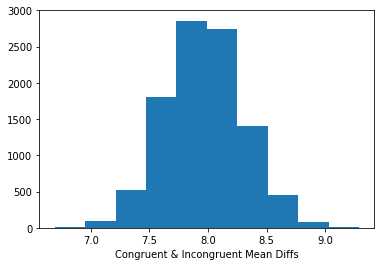

In [8]:
# plot sampling distribution
plt.hist(diffs);
plt.xlabel('Congruent & Incongruent Mean Diffs')

Text(0.5,0,'Congruent & Incongruent Mean')

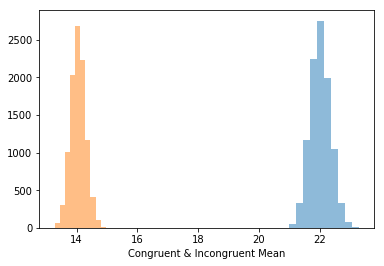

In [9]:
# plotting our samples
plt.hist(incong, alpha = 0.5);
plt.hist(cong, alpha = 0.5);
plt.xlabel('Congruent & Incongruent Mean')

**After looking at the plots we have created we can see that:**
* The differences in the means for the sampling distribution we have created is greater than 0 which supports the alternative hypothesis.
* In the scond plot we can see that the means of our samples are way different than each other, in fact, the Incogruent means are much greater than the the Congruent means.

**Evidences to reject the null hypothesis based on the results:**
* The differences in the means for the sampling distribution we have created is greater than 0.
* The means of the Incongruent is greater than the means of the congruent.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

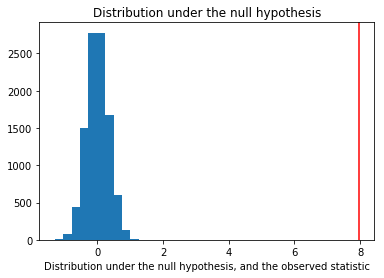

In [10]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=obs_diff, color='red');
plt.title('Distribution under the null hypothesis');
plt.xlabel('Distribution under the null hypothesis, and the observed statistic');

In [11]:
# p-value
(null_vals - obs_diff).mean()

-7.962385444669696

In [12]:
# 95% confidence interval
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(7.327279749999991, 8.639770250000002)

In [13]:
# I wil perform a Two-sided Test
# first we will set columns to list to use in test function
congr= df['Congruent'].values.tolist()
incongr= df['Incongruent'].values.tolist()

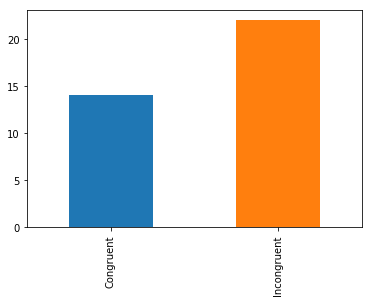

In [14]:
# plot the mean
df.mean().plot('bar');

In [15]:
# perform test
stats.ttest_rel(incongr, congr)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

**Why to use a Two-sided Test?**
"The decision of which statistical test to use depends on the research design, the distribution of the data, and the type of variable." [Types of Statistical Tests](https://cyfar.org/types-statistical-tests)
And because we are comparing the means (lookign for the difference in the means) for two related samples, and our hypotheses are whether the means are equal or not I have choosen the Two-sided Test. [scipy.stats.ttest_rel[(https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html)


**We can add now more points to the previous list (Evidences to reject the null hypothesis):**
* The big difference between the distribution under the null hypothesis and the distribution of our data. ( as seen in the plot)
* The p-value is less than type 1 error (type 1 error = 0.05, and the p-value = -7.967)
* The observed mean falls within 95% confidence interval.
* the p-value in our T-Test is less that the test statistic.

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test_a_Perceptual_Phenomenon.ipynb'])

0